Categorical target data analysis:: read of file::

In [3]:
import pandas as pd
bc=pd.read_csv(r"E:\Python Dataset\BreastCancer.csv")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import warnings 
warnings.filterwarnings('ignore')
bc.shape
#bc=bc.drop(["Class"],axis=1)
bc.shape
bc.head(10)
bc.tail(10)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#AUCROC CURVE=Area Under Curve of Receiver Operating Characteristics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#PRC =Precision Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 

In [5]:
bc.head()

Unnamed: 0       Id  Cl.thickness  Cell.size  Cell.shape  Marg.adhesion  \
0           1  1000025             5          1           1              1   
1           2  1002945             5          4           4              5   
2           3  1015425             3          1           1              1   
3           4  1016277             6          8           8              1   
4           5  1017023             4          1           1              3   

   Epith.c.size  Bare.nuclei  Bl.cromatin  Normal.nucleoli  Mitoses   Class  
0             2          1.0            3                1        1  benign  
1             7         10.0            3                2        1  benign  
2             2          2.0            3                1        1  benign  
3             3          4.0            3                7        1  benign  
4             2          1.0            3                1        1  benign

In [3]:
bc.isnull().sum()

Unnamed: 0          0
Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [4]:
bc=bc.rename(columns={"Bare.nuclei":"Barenuclei"})
bc=bc.rename(columns={"Cl.thickness":"Clthickness"})
bc=bc.rename(columns={"Cell.size":"Cellsize"})
bc=bc.rename(columns={"Cell.shape":"Cellshape"})
bc=bc.rename(columns={"Marg.adhesion":"Margadhesion"})
bc=bc.rename(columns={"Epith.c.size":"Epithcsize"})
bc=bc.rename(columns={"Bl.cromatin":"Blcromatin"})
bc=bc.rename(columns={"Normal.nucleoli":"Normalnucleoli"})

In [5]:
bc.Class.replace({"benign":0,"malignant":1},inplace=True)

In [6]:
bc.dtypes

Unnamed: 0          int64
Id                  int64
Clthickness         int64
Cellsize            int64
Cellshape           int64
Margadhesion        int64
Epithcsize          int64
Barenuclei        float64
Blcromatin          int64
Normalnucleoli      int64
Mitoses             int64
Class               int64
dtype: object

In [7]:
bc.Barenuclei=bc.Barenuclei.fillna(bc.Barenuclei.median())

Duplicate checking::

In [9]:
bc.shape

(699, 12)

In [10]:
bc.drop_duplicates(inplace=True)

In [11]:
bc.shape

(699, 12)

EDA::
#class imbalance::

In [13]:
bc.Class.value_counts()

Class
0    458
1    241
Name: count, dtype: int64

In [14]:
bc_x=bc.iloc[:,0:-1]

In [15]:
bc_y=bc.iloc[:,-1]

In [16]:
from imblearn.over_sampling import RandomOverSampler
a1=RandomOverSampler(random_state=52)
x_over,y_over=a1.fit_resample(bc_x,bc_y)
x_over.shape,y_over.shape

((916, 11), (916,))

In [71]:
y_over.value_counts()

Class
0    458
1    458
Name: count, dtype: int64

outlier treatment::Detect & impute the outliers::

In [ ]:
import seaborn as sns
sns.boxplot(data=bc,y="Id")

In [ ]:
outliers=[]
l1=bc["Id"]
def detect_outlier(l1):
 threshold=3
 mean=np.mean(l1)
 std=np.std(l1)

 for i in l1:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l1)

In [ ]:
sns.distplot(bc.Id)

In [ ]:
ub=bc["Id"].mean()+3*bc["Id"].std()
lb=bc["Id"].mean()-3*bc["Id"].std()
print(ub,lb)

In [ ]:
bc["Id"].describe()

In [ ]:
bc.loc[bc["Id"]<lb,"Id"]=bc
sns.boxplot(data=bc,y="Id")

In [ ]:
bc.Id.skew()

In [ ]:
import numpy as np
np.log(0)

In [ ]:
bc.shape

In [ ]:
bc_new=bc[bc.Id>0]
bc_new.shape

In [ ]:
bc["Id"]=np.log(bc["Id"])
bc.Id.skew()

In [ ]:
IQR=bc.Id.quantile(0.75)-bc.Id.quantile(0.25)
L1=bc["Id"].quantile(0.25)-(IQR*3)
U1=bc["Id"].quantile(0.75)+(IQR*3)
print(L1,U1)

In [ ]:
bc.loc[bc["Id"]>U1,"Id"]=U1
sns.distplot(bc.Id)

In [ ]:
import seaborn as sns
sns.boxplot(data=bc,y="Cl.thickness")#no need to do outlier treatment here.

In [ ]:
sns.distplot(bc.Clthickness)

In [ ]:
bc_new=bc[bc.Clthickness>0]
bc_new.shape

In [ ]:
bc["Clthickness"]=np.log(bc["Clthickness"])
bc.Clthickness.skew()

In [ ]:
IQR=bc.Clthickness.quantile(0.75)-bc.Clthickness.quantile(0.25)
L1=bc["Clthickness"].quantile(0.25)-(IQR*3)
U1=bc["Clthickness"].quantile(0.75)+(IQR*3)
print(L1,U1)

In [ ]:
bc.loc[bc["Clthickness"]>U1,"Clthickness"]=U1
sns.distplot(bc.Clthickness)

In [ ]:
import seaborn as sns
sns.boxplot(data=bc,y="Cellsize")#no outlier treatment is required here.

In [ ]:
sns.distplot(bc.Cellsize)

In [ ]:
bc_new=bc[bc.Cellsize>0]
bc_new.shape

In [ ]:
bc["Cellsize"]=np.log(bc["Cellsize"])
bc.Cellsize.skew()

In [ ]:
IQR=bc.Cellsize.quantile(0.75)-bc.Cellsize.quantile(0.25)
L1=bc["Cellsize"].quantile(0.25)-(IQR*3)
U1=bc["Cellsize"].quantile(0.75)+(IQR*3)
print(L1,U1)

In [ ]:
bc.loc[bc["Cellsize"]>U1,"Cellsize"]=U1
sns.distplot(bc.Cellsize)

In [ ]:
import seaborn as sns
sns.boxplot(data=bc,y="Cellshape")#no need to do outlier treatment here.

In [ ]:
sns.distplot(bc.Cellshape)

In [ ]:
bc_new=bc[bc.Cellshape>0]
bc_new.shape

In [ ]:
bc["Cellshape"]=np.log(bc["Cellshape"])
bc.Cellshape.skew()

In [ ]:
IQR=bc.Cellshape.quantile(0.75)-bc.Cellshape.quantile(0.25)
L1=bc["Cellshape"].quantile(0.25)-(IQR*3)
U1=bc["Cellshape"].quantile(0.75)+(IQR*3)
print(L1,U1)

In [ ]:
bc.loc[bc["Cellshape"]>U1,"Cellshape"]=U1
sns.distplot(bc.Cellshape)

In [ ]:
import seaborn as sns
sns.boxplot(data=bc,y="Margadhesion")

In [ ]:
outliers=[]
l2=bc["Margadhesion"]
def detect_outlier(l2):
 threshold=3
 mean=np.mean(l2)
 std=np.std(l2)

 for i in l2:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l2)

In [ ]:
sns.distplot(bc.Margadhesion)

In [ ]:
ub=bc["Margadhesion"].mean()+3*bc["Margadhesion"].std()
lb=bc["Margadhesion"].mean()-3*bc["Margadhesion"].std()
print(ub,lb)

In [ ]:
bc["Margadhesion"].describe()

In [ ]:
bc.loc[bc["Margadhesion"]>ub,"Margadhesion"]=ub
sns.boxplot(data=bc,y="Margadhesion")

In [ ]:
bc_new=bc[bc.Margadhesion>0]
bc_new.shape

In [ ]:
bc["Margadhesion"]=np.log(bc["Margadhesion"])
bc.Margadhesion.skew()

In [ ]:
IQR=bc.Cellshape.quantile(0.75)-bc.Cellshape.quantile(0.25)
L1=bc["Margadhesion"].quantile(0.25)-(IQR*3)
U1=bc["Margadhesion"].quantile(0.75)+(IQR*3)
print(L1,U1)

In [ ]:
bc.loc[bc["Margadhesion"]>U1,"Margadhesion"]=U1
sns.distplot(bc.Margadhesion)

In [ ]:
import seaborn as sns
sns.boxplot(data=bc,y="Epithcsize")

In [ ]:
outliers=[]
l3=bc["Epithcsize"]
def detect_outlier(l3):
 threshold=3
 mean=np.mean(l3)
 std=np.std(l3)

 for i in l2:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l3)

In [ ]:
ub=bc["Epithcsize"].mean()+3*bc["Epithcsize"].std()
lb=bc["Epithcsize"].mean()-3*bc["Epithcsize"].std()
print(ub,lb)

In [ ]:
bc["Epithcsize"].describe()

In [ ]:
bc.loc[bc["Epithcsize"]>ub,"Epithcsize"]=ub
sns.boxplot(data=bc,y="Epithcsize")

In [ ]:
import seaborn as sns
sns.boxplot(data=bc,y="Barenuclei")#no need to perform outlier treatment.

In [ ]:
sns.distplot(bc.Barenuclei)

In [ ]:
bc_new=bc[bc.Barenuclei>0]
bc_new.shape

In [ ]:
bc["Barenuclei"]=np.log(bc["Barenuclei"])
bc.Barenuclei.skew()

In [ ]:
IQR=bc.Barenuclei.quantile(0.75)-bc.Barenuclei.quantile(0.25)
L1=bc["Barenuclei"].quantile(0.25)-(IQR*3)
U1=bc["Barenuclei"].quantile(0.75)+(IQR*3)
print(L1,U1)

In [ ]:
bc.loc[bc["Barenuclei"]>U1,"Barenuclei"]=U1
sns.distplot(bc.Barenuclei)

In [ ]:
import seaborn as sns
sns.boxplot(data=bc,y="Blcromatin")

In [ ]:
outliers=[]
l4=bc["Blcromatin"]
def detect_outlier(l4):
 threshold=3
 mean=np.mean(l4)
 std=np.std(l4)

 for i in l2:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l4)

In [ ]:
ub=bc["Blcromatin"].mean()+3*bc["Blcromatin"].std()
lb=bc["Blcromatin"].mean()-3*bc["Blcromatin"].std()
print(ub,lb)

In [ ]:
bc["Blcromatin"].describe()

In [ ]:
bc.loc[bc["Blcromatin"]>ub,"Blcromatin"]=ub
sns.boxplot(data=bc,y="Blcromatin")

In [ ]:
bc_new=bc[bc.Blcromatin>0]
bc_new.shape

In [ ]:
bc["Blcromatin"]=np.log(bc["Blcromatin"])
bc.Blcromatin.skew()

In [ ]:
IQR=bc.Blcromatin.quantile(0.75)-bc.Blcromatin.quantile(0.25)
L1=bc["Blcromatin"].quantile(0.25)-(IQR*3)
U1=bc["Blcromatin"].quantile(0.75)+(IQR*3)
print(L1,U1)

In [ ]:
bc.loc[bc["Blcromatin"]>U1,"Blcromatin"]=U1
sns.distplot(bc.Blcromatin)

In [ ]:
sns.boxplot(data=bc,y="Normal.nucleoli")

In [ ]:
outliers=[]
l5=bc["Normal.nucleoli"]
def detect_outlier(l5):
 threshold=3
 mean=np.mean(l5)
 std=np.std(l5)

 for i in l5:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l5)

In [ ]:
ub=bc["Normal.nucleoli"].mean()+3*bc["Normal.nucleoli"].std()
lb=bc["Normal.nucleoli"].mean()-3*bc["Normal.nucleoli"].std()
print(ub,lb)

In [ ]:
bc["Normal.nucleoli"].describe()

In [ ]:
bc.loc[bc["Normal.nucleoli"]>ub,"Normal.nucleoli"]=ub
sns.boxplot(data=bc,y="Normal.nucleoli")

In [ ]:
sns.distplot(bc.Normalnucleoli)

In [ ]:
bc_new=bc[bc.Normalnucleoli>0]
bc_new.shape

In [ ]:
bc["Normalnucleoli"]=np.log(bc["Normalnucleoli"])
bc.Normalnucleoli.skew()

In [ ]:
IQR=bc.Normalnucleoli.quantile(0.75)-bc.Normalnucleoli.quantile(0.25)
L1=bc["Normalnucleoli"].quantile(0.25)-(IQR*3)
U1=bc["Normalnucleoli"].quantile(0.75)+(IQR*3)
print(L1,U1)

In [ ]:
bc.loc[bc["Normalnucleoli"]>U1,"Normalnucleoli"]=U1
sns.distplot(bc.Normalnucleoli)

In [ ]:
sns.boxplot(bc.Mitoses)

In [ ]:
outliers=[]
l6=bc["Mitoses"]
def detect_outlier(l6):
 threshold=3
 mean=np.mean(l6)
 std=np.std(l6)

 for i in l6:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l6)

In [ ]:
ub=bc["Mitoses"].mean()+3*bc["Mitoses"].std()
lb=bc["Mitoses"].mean()-3*bc["Mitoses"].std()
print(ub,lb)

In [ ]:
bc["Mitoses"].describe()

In [ ]:
bc.loc[bc["Mitoses"]>ub,"Mitoses"]=ub
sns.boxplot(data=bc,y="Mitoses")

In [73]:
bc1=bc.corr()
bc1

Unnamed: 0        Id  Clthickness  Cellsize  Cellshape  \
Unnamed: 0        1.000000  0.079120    -0.125619 -0.099063  -0.119104   
Id                0.079120  1.000000    -0.055308 -0.041603  -0.041576   
Clthickness      -0.125619 -0.055308     1.000000  0.644913   0.654589   
Cellsize         -0.099063 -0.041603     0.644913  1.000000   0.906882   
Cellshape        -0.119104 -0.041576     0.654589  0.906882   1.000000   
Margadhesion     -0.056690 -0.064878     0.486356  0.705582   0.683079   
Epithcsize       -0.186679 -0.045528     0.521816  0.751799   0.719668   
Barenuclei       -0.176299 -0.092533     0.590008  0.686673   0.707474   
Blcromatin       -0.147196 -0.060051     0.558428  0.755721   0.735948   
Normalnucleoli   -0.149697 -0.052072     0.535835  0.722865   0.719446   
Mitoses          -0.134098 -0.034901     0.350034  0.458693   0.438911   
Class            -0.195603 -0.080226     0.716001  0.817904   0.818934   

                Margadhesion  Epithcsize  Barenuclei  Blcromatin  \
Unnamed: 0         -0.056690   -0.186679   -0.176299   -0.147196   
Id                 -0.064878   -0.045528   -0.092533   -0.060051   
Clthickness         0.486356    0.521816    0.590008    0.558428   
Cellsize            0.705582    0.751799    0.686673    0.755721   
Cellshape           0.683079    0.719668    0.707474    0.735948   
Margadhesion        1.000000    0.599599    0.666971    0.666715   
Epithcsize          0.599599    1.000000    0.583701    0.616102   
Barenuclei          0.666971    0.583701    1.000000    0.674215   
Blcromatin          0.666715    0.616102    0.674215    1.000000   
Normalnucleoli      0.603352    0.628881    0.574778    0.665878   
Mitoses             0.417633    0.479101    0.342397    0.344169   
Class               0.696800    0.682785    0.818968    0.756616   

                Normalnucleoli   Mitoses     Class  
Unnamed: 0           -0.149697 -0.134098 -0.195603  
Id                   -0.052072 -0.034901 -0.080226  
Clthickness           0.535835  0.350034  0.716001  
Cellsize              0.722865  0.458693  0.817904  
Cellshape             0.719446  0.438911  0.818934  
Margadhesion          0.603352  0.417633  0.696800  
Epithcsize            0.628881  0.479101  0.682785  
Barenuclei            0.574778  0.342397  0.818968  
Blcromatin            0.665878  0.344169  0.756616  
Normalnucleoli        1.000000  0.428336  0.712244  
Mitoses               0.428336  1.000000  0.423170  
Class                 0.712244  0.423170  1.000000

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(bc1)
plt.show()

train_test_split::

In [89]:
x=bc.iloc[:,2:11]

In [91]:
x.shape
x.head()

Clthickness  Cellsize  Cellshape  Margadhesion  Epithcsize  Barenuclei  \
0            5         1          1             1           2         1.0   
1            5         4          4             5           7        10.0   
2            3         1          1             1           2         2.0   
3            6         8          8             1           3         4.0   
4            4         1          1             3           2         1.0   

   Blcromatin  Normalnucleoli  Mitoses  
0           3               1        1  
1           3               2        1  
2           3               1        1  
3           3               7        1  
4           3               1        1

In [97]:
y=bc.iloc[:,-1]

In [99]:
y.shape
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [101]:
import sklearn
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=80)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((559, 9), (140, 9), (559,), (140,))

model building::

2.Decision Tree(DT)::

In [113]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [115]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [130]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [117]:
p1=dt.predict(x_test)
p1

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [136]:
M1=confusion_matrix(p1,y_test)
M1

array([[89,  6],
       [ 1, 44]], dtype=int64)

In [138]:
acc1=M1.diagonal().sum()/M1.sum()*100
acc1

95.0

In [142]:
print(classification_report(p1,y_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        95
           1       0.88      0.98      0.93        45

    accuracy                           0.95       140
   macro avg       0.93      0.96      0.94       140
weighted avg       0.95      0.95      0.95       140



In [ ]:
3 Random Forest (RF)::

In [148]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [150]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [152]:
RandomForestClassifier()

RandomForestClassifier()

In [170]:
p2=rf.predict(x_test)
p2

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [172]:
M2=confusion_matrix(p2,y_test)
M2

array([[88,  3],
       [ 2, 47]], dtype=int64)

In [174]:
acc2=M2.diagonal().sum()/M2.sum()*100
acc2

96.42857142857143

In [168]:
print(classification_report(p2,y_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        95
           1       0.88      0.98      0.93        45

    accuracy                           0.95       140
   macro avg       0.93      0.96      0.94       140
weighted avg       0.95      0.95      0.95       140



3.KNN::

In [215]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=90)

In [217]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=90)

In [219]:
KNeighborsClassifier(n_neighbors=90)

KNeighborsClassifier(n_neighbors=90)

In [185]:
p3=knn.predict(x_test)
p3

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [189]:
M3=confusion_matrix(p3,y_test)
M3

array([[89,  7],
       [ 1, 43]], dtype=int64)

In [193]:
acc3=M3.diagonal().sum()/M3.sum()*100
acc3

94.28571428571428

In [197]:
print(classification_report(p3,y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        96
           1       0.86      0.98      0.91        44

    accuracy                           0.94       140
   macro avg       0.92      0.95      0.94       140
weighted avg       0.95      0.94      0.94       140



In [199]:
lst=list()

In [221]:
for i in range(1,60):
   knn=KNeighborsClassifier(n_neighbors=i)
   knn.fit(x_train,y_train)
   knn_pr=knn.predict(x_test)
   mat=confusion_matrix(knn_pr,y_test)
   acc=mat.diagonal().sum()/mat.sum()*100
   lst.append(acc)

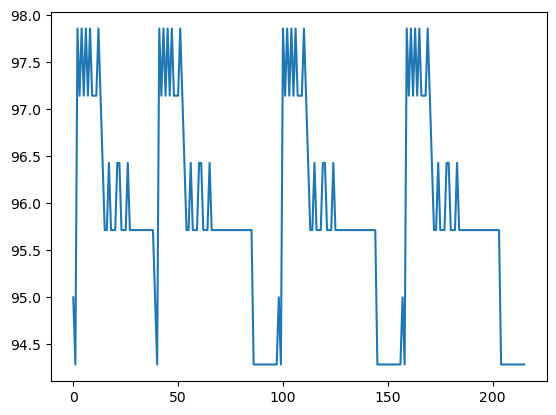

In [223]:
import matplotlib.pyplot as plt
p=plt.plot(lst)

5.SVM(Support Vector Machine)::

In [225]:
from sklearn.svm import SVC
svc=SVC()

In [227]:
svc.fit(x_train,y_train)

SVC()

In [229]:
SVC()

SVC()

In [231]:
p4=svc.predict(x_test)
p4

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [233]:
M4=confusion_matrix(p4,y_test)
M4

array([[89,  0],
       [ 1, 50]], dtype=int64)

In [235]:
acc4=M4.diagonal().sum()/M4.sum()*100
acc4

99.28571428571429

In [237]:
print(classification_report(p4,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       1.00      0.98      0.99        51

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



5 .Naive Bayes::

In [239]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [241]:
import warnings 
warnings.filterwarnings('ignore')

In [243]:
nb.fit(x_train,y_train)

MultinomialNB()

In [245]:
p5=nb.predict(x_test)
p5

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [249]:
M5=confusion_matrix(p5,y_test)
M5

array([[84, 12],
       [ 6, 38]], dtype=int64)

In [251]:
acc5=M5.diagonal().sum()/M5.sum()*100
acc5

87.14285714285714

In [255]:
print(classification_report(p5,y_test))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        96
           1       0.76      0.86      0.81        44

    accuracy                           0.87       140
   macro avg       0.85      0.87      0.86       140
weighted avg       0.88      0.87      0.87       140



Feature selection::CHI_SQUARE_TEST::

In [259]:
cst = SelectKBest(score_func = chi2, k ="all")

In [261]:
cst_fit=cst.fit(x_train,y_train)

In [263]:
cst_score = cst_fit.scores_
cst_score

array([ 498.74257727, 1096.17797385, 1014.35823301,  753.4366739 ,
        382.71853647, 1412.08846701,  541.15853802,  971.63617443,
        188.11513143])

In [265]:
pdf = pd.DataFrame(cst_score)
pdf

0
0   498.742577
1  1096.177974
2  1014.358233
3   753.436674
4   382.718536
5  1412.088467
6   541.158538
7   971.636174
8   188.115131

In [273]:
pdf1 = pd.DataFrame({"feature score":list(cst_score),"columns":list(bc.iloc[:,2:11].columns)})
pdf1

feature score          columns
0     498.742577     Cl.thickness
1    1096.177974        Cell.size
2    1014.358233       Cell.shape
3     753.436674    Marg.adhesion
4     382.718536     Epith.c.size
5    1412.088467      Bare.nuclei
6     541.158538      Bl.cromatin
7     971.636174  Normal.nucleoli
8     188.115131          Mitoses

Final insight::

In [ ]:
As in the accuracy perfomance we are getting 87.14%  by SVM model which is an generalize  model and the best fitted for this dataset.
To overcome this issue we can apply feature selection technique to get the values of the observations which helps to decide the importances of the them .